# Titanic Survival Prediction Model

This project aims to train a model that can predict whether or not a passenger survived the Titanic using the real dataset containing the information of the people onboard the ship before it sank.

Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load the dataset

In [6]:
raw_data = pd.read_csv("Titanic-Dataset.csv", encoding = "latin1")
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
raw_data.shape

(891, 12)

Drop unnecessary and null columns and replace the missing values in the 'Age' column with the median age

In [10]:
dataset = raw_data.drop(columns = ['Cabin', 'Name', 'SibSp', 'Parch', 'Ticket'])
dataset.rename(columns={'Pclass': 'Tckt_class'}, inplace=True)
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset = dataset.dropna(axis = 0, how = 'any')
dataset.head(10)

,PassengerId,Survived,Tckt_class,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S
5,6,0,3,male,28.0,8.4583,Q
6,7,0,1,male,54.0,51.8625,S
7,8,0,3,male,2.0,21.0750,S
8,9,1,3,female,27.0,11.1333,S
9,10,1,2,female,14.0,30.0708,C


In [11]:
dataset.shape

(889, 7)

Check the data type of the columns

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Tckt_class   889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   Fare         889 non-null    float64
 6   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


Change the data type to the appropriate ones

In [15]:
dataset['Sex'] = dataset['Sex'].astype('string')
dataset['Age'] =dataset['Age'].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Tckt_class   889 non-null    int64  
 3   Sex          889 non-null    string 
 4   Age          889 non-null    int32  
 5   Fare         889 non-null    float64
 6   Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(1), string(1)
memory usage: 52.1+ KB


#### Begin Exploratory Data Analysis to determine the features of the model

Bar Chart of Survival by Gender

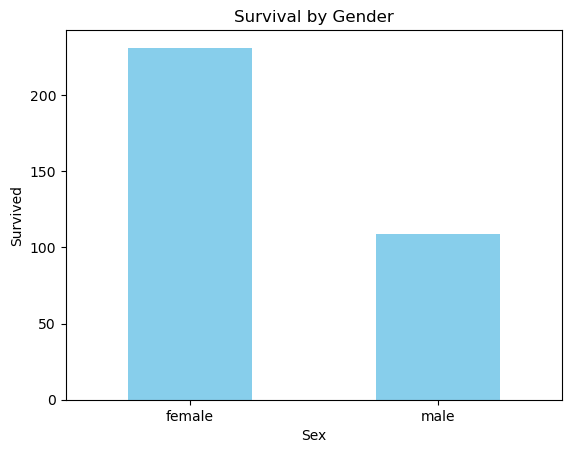

In [18]:
survive_count = dataset[dataset['Survived'] == 1].groupby('Sex').size()

survive_count.plot(kind = 'bar', color = 'skyblue', legend = False)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Survival by Gender')
plt.xticks(rotation = 0)
plt.show()

Determine whether Gender has a correlation with Survival

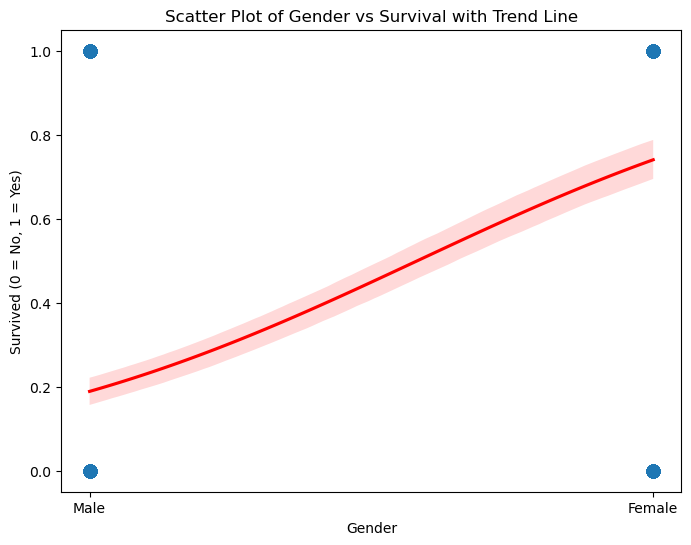

In [20]:
dataset['Gender'] = dataset['Sex'].map({'male': 0, 'female': 1})

plt.figure(figsize=(8, 6))
sns.regplot(x = 'Gender', y = 'Survived', data = dataset, logistic = True, scatter_kws = {'alpha': 0.6, 's': 80}, line_kws = {'color': 'red'})

plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.title('Scatter Plot of Gender vs Survival with Trend Line')

plt.show()

Bar Chart of Survival by Age

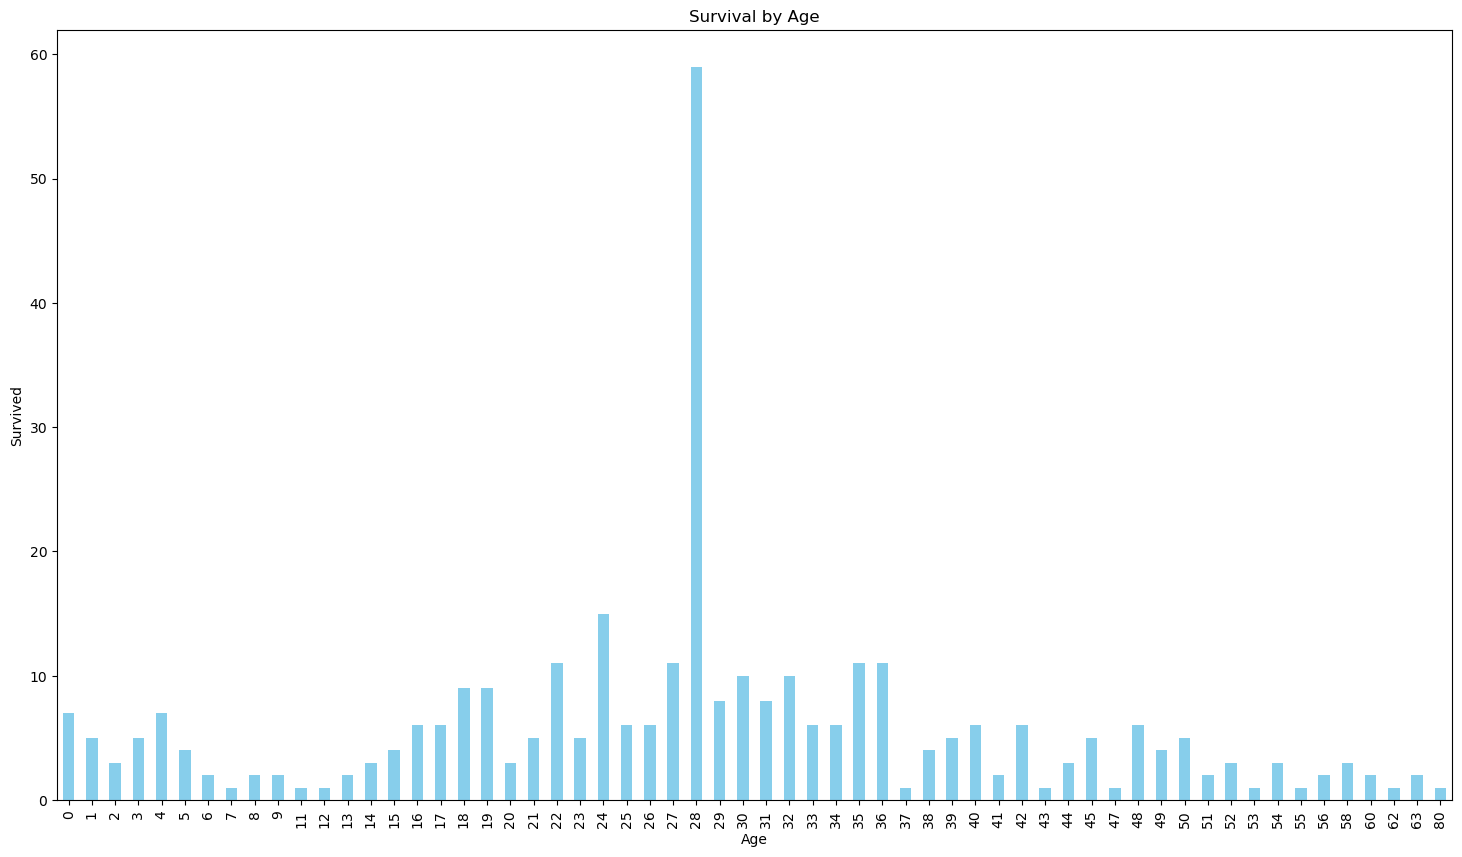

In [22]:
survive_count = dataset[dataset['Survived'] == 1].groupby('Age').size()

plt.figure(figsize=(18, 10))
survive_count.plot(kind = 'bar', color = 'skyblue', legend = False)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Survival by Age')
plt.xticks(rotation = 90)
plt.show()

Determine whether Age has a correlation with Survival

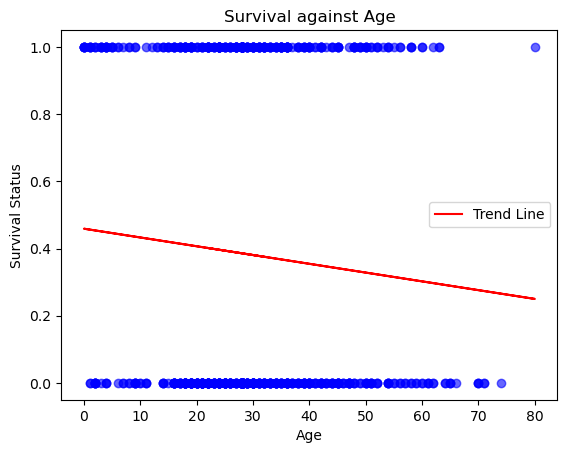

In [24]:
plt.scatter(dataset['Age'], dataset['Survived'], color='blue', alpha=0.6)

model = LinearRegression()
X = dataset['Age'].values.reshape(-1, 1)
y = dataset['Survived']
model.fit(X, y)
trendline = model.predict(X)
plt.plot(dataset['Age'], trendline, color='red', label='Trend Line')

plt.xlabel('Age')
plt.ylabel('Survival Status')
plt.title('Survival against Age')
plt.legend()
plt.show()

Determine whether Fare has a correlation with Survival

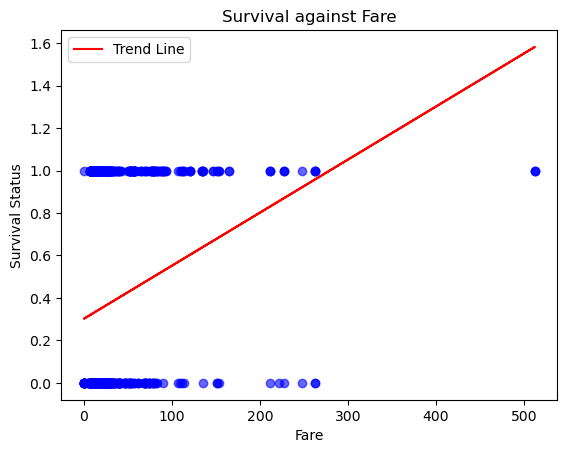

In [26]:
plt.scatter(dataset['Fare'], dataset['Survived'], color='blue', alpha=0.6)

model = LinearRegression()
X = dataset['Fare'].values.reshape(-1, 1)
y = dataset['Survived']
model.fit(X, y)
trendline = model.predict(X)
plt.plot(dataset['Fare'], trendline, color='red', label='Trend Line')

plt.xlabel('Fare')
plt.ylabel('Survival Status')
plt.title('Survival against Fare')
plt.legend()
plt.show()

Bar Chart of Survival by Ticket Class

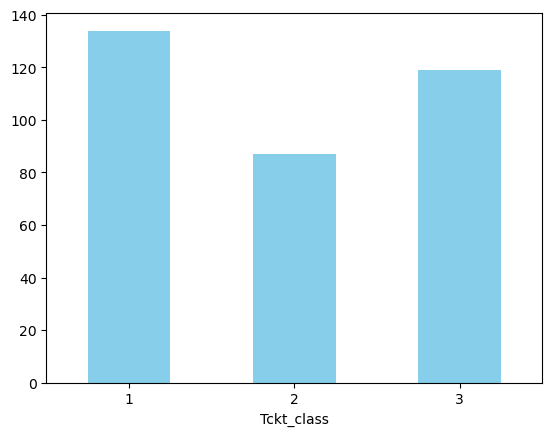

In [28]:
survive_count = dataset[dataset['Survived'] == 1].groupby('Tckt_class').size()

survive_count.plot(kind = 'bar', color = 'skyblue', legend = False)
plt.xticks(rotation = 0)
plt.show()

Bar chart of Survival by Embarked

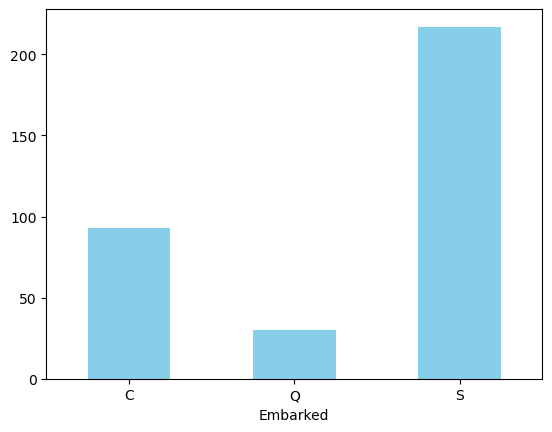

In [30]:
survive_count = dataset[dataset['Survived'] == 1].groupby('Embarked').size()

survive_count.plot(kind = 'bar', color = 'skyblue', legend = False)
plt.xticks(rotation = 0) 
plt.show()

#### Train the model

A Gradient Boosting Classifier was used to increase accuracy of prediction

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
df = dataset.drop(columns = ['PassengerId'])
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

Map the categorical variables to numerical values

In [35]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Split the data into training and testing sets

In [37]:
X = df.drop(columns=['Survived'])  
y = df['Survived']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Train the gradient boosting classifier, make predictions and calculate accuracy score

In [39]:
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

x_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, x_pred)
print('Accuracy Score', accuracy)

Accuracy Score 0.797752808988764
